### Libraries

In [1]:
import argparse
import subprocess
import os
import time
import keras
import pandas as pd
import tensorflow as tf
from PIL import Image                                                            
import numpy as np                                                                   
import glob
import cv2
from keras.layers import Dense, Dropout, Activation, Flatten
from matplotlib.image import imread
import matplotlib.pyplot as plt

### Defining the model

In [2]:
def get_model(im_size):
    inpt = keras.layers.Input((im_size,im_size,3))
    base_model = tf.keras.applications.Xception(input_tensor=inpt,weights=None,include_top=False,pooling='avg')
    x = base_model.output
    out = keras.layers.Dense(1,activation='sigmoid')(x)
    inf_model = keras.models.Model(inpt,out)
    return inf_model

def get_pred(model,generator):
    pred = model.predict_generator(generator,steps=len(ls)//batch_size+1)
    pred = pred[:,0]
    return pred

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument("-w",help="Trained weights path", default="bt_xception_80_20.h5")
parser.add_argument("-b",type=int,help="Batch size. Higher value means faster processing but more memory utilisation.", default=256)
args = parser.parse_args(args=[])

In [4]:
weights_path = args.w
batch_size = args.b
im_size = 128

In [5]:
inf_model = get_model(im_size)
inf_model.load_weights(weights_path)

### Compiling the model

In [6]:
inf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### Data

In [8]:
%cd Keras/images/train

C:\Users\Sai Ganesh\Keras\images\train


In [11]:
#cd
#%cd Keras/images/train
y_train=[]
x_train=[]
entries=os.listdir('C:/Users/Sai Ganesh/Keras/images/train')
for entry in entries:
    x = entry.split("_")[-1:][0].split('.jpg')[0]
    y_train.append(float(x))
    img = imread(entry) #rgb images
    x_train.append(img)
y_train=np.array(y_train) 
x_train=np.array(x_train)
print(x_train.shape, y_train.shape)

(3000, 128, 128, 3) (3000,)


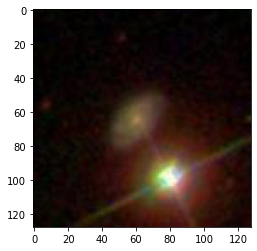

In [12]:
plt.imshow(x_train[3])

In [15]:
%cd Keras/images/test2

C:\Users\Sai Ganesh\Keras\images\test2


In [16]:
#cd
#%cd Keras/images/test2
y_test=[]
x_test=[]
entries=os.listdir('C:/Users/Sai Ganesh/Keras/images/test2')
for entry in entries:
    x = entry.split("_")[-1:][0].split('.jpg')[0]
    y_test.append(float(x))
    img = imread(entry) #rgb images
    x_test.append(img)
y_test=np.array(y_test) 
x_test=np.array(x_test)
print(x_test.shape, y_test.shape)

(1000, 128, 128, 3) (1000,)


In [18]:
%cd Keras/images/valid2

C:\Users\Sai Ganesh\Keras\images\valid2


In [20]:
#cd
#%cd Keras/images/valid2
y_valid=[]
x_valid=[]
entries=os.listdir('C:/Users/Sai Ganesh/Keras/images/valid2')
for entry in entries:
    x = entry.split("_")[-1:][0].split('.jpg')[0]
    y_valid.append(float(x))
    img = imread(entry) #rgb images
    x_valid.append(img)
y_valid=np.array(y_valid) 
x_valid=np.array(x_valid)
print(x_valid.shape, y_valid.shape)

(1000, 128, 128, 3) (1000,)


In [21]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_valid.shape, y_valid.shape)

(3000, 128, 128, 3) (3000,) (1000, 128, 128, 3) (1000,) (1000, 128, 128, 3) (1000,)


In [22]:
x_train = x_train/255
x_test = x_test/255
#x_valid = x_valid/255

In [23]:
inf_model.fit(x_test,y_test,batch_size,epochs=20)
score=inf_model.evaluate(x_test,y_test)

Epoch 1/20
4/4 [==============================] - 344s 83s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 371s 93s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/20
4/4 [==============================] - 379s 93s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/20
4/4 [==============================] - 365s 91s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/20
4/4 [==============================] - 386s 94s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/20
4/4 [==============================] - 375s 93s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/20
3/4 [=====================>........] - ETA: 1:34 - loss: 0.0000e+00 - accuracy: 0.0000e+00

KeyboardInterrupt: 